In [1]:
using Distributions

tstat(μ, X) = (mean(X) - μ)/√(var(X) / length(X))
pvalue(μ, X) = 2ccdf(TDist(length(X) - 1), abs(tstat(μ, X)))

function ci(X, α)
    X̄ = mean(X)
    c = quantile(TDist(length(X) - 1), 1 - α/2)
    d = √(var(X) / length(X))
    X̄ - c*d, X̄ + c*d
end

isininterval(x, int) = first(int) ≤ x ≤ last(int)
isinci(μ, X, α) = isininterval(μ, ci(X, α))

prob_trueisinci(dist, n, α; L=10^6) = mean(isinci(mean(dist), rand(dist, n), α) for _ in 1:L)

prob_trueisinci (generic function with 1 method)

In [2]:
prob_trueisinci(Normal(), 20, 0.05)

0.949866

In [3]:
prob_trueisinci(Uniform(), 20, 0.05)

0.948872

In [4]:
prob_trueisinci(Exponential(), 20, 0.05)

0.918784

In [5]:
prob_trueisinci(MixtureModel([Normal(), Normal(10, 1)], [0.95, 0.05]), 20, 0.05)

0.795997

In [6]:
using Plots

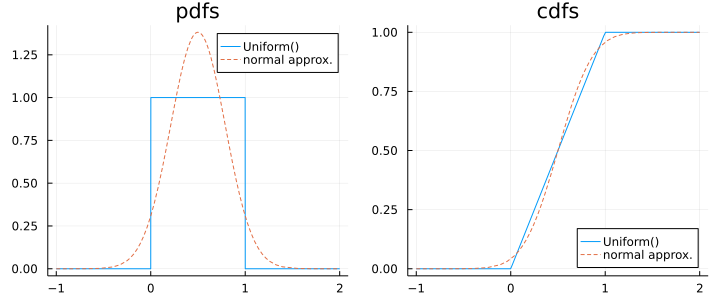

In [7]:
normal = Normal(mean(Uniform()), std(Uniform()))
P = plot(x -> pdf(Uniform(), x), -1, 2; label="Uniform()")
plot!(x -> pdf(normal, x), -1, 2; label="normal approx.", ls=:dash)
title!("pdfs")
Q = plot(x -> cdf(Uniform(), x), -1, 2; label="Uniform()")
plot!(x -> cdf(normal, x), -1, 2; label="normal approx.", ls=:dash)
title!("cdfs"; legend=:bottomright)
plot(P, Q; size=(720, 300))

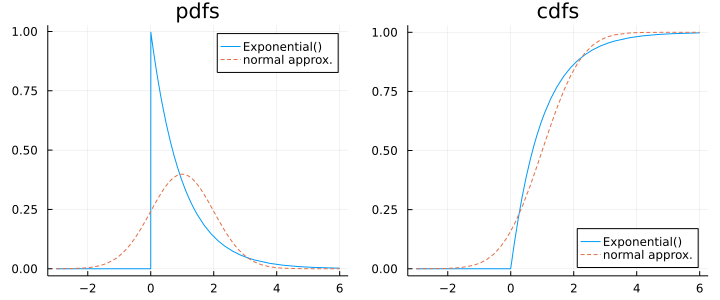

In [8]:
normal = Normal(mean(Exponential()), std(Exponential()))
P = plot(x -> pdf(Exponential(), x), -3, 6; label="Exponential()")
plot!(x -> pdf(normal, x), -3, 6; label="normal approx.", ls=:dash)
title!("pdfs")
Q = plot(x -> cdf(Exponential(), x), -3, 6; label="Exponential()")
plot!(x -> cdf(normal, x), -3, 6; label="normal approx.", ls=:dash)
title!("cdfs"; legend=:bottomright)
plot(P, Q; size=(720, 300))

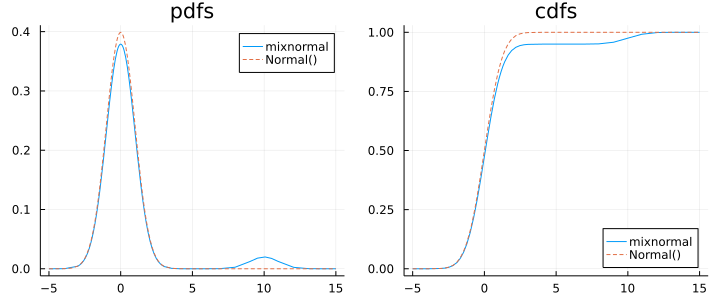

In [9]:
mixnormal = MixtureModel([Normal(), Normal(10, 1)], [0.95, 0.05])
P = plot(x -> pdf(mixnormal, x), -5, 15; label="mixnormal")
plot!(x -> pdf(Normal(), x), -5, 15; label="Normal()", ls=:dash)
title!("pdfs")
Q = plot(x -> cdf(mixnormal, x), -5, 15; label="mixnormal")
plot!(x -> cdf(Normal(), x), -5, 15; label="Normal()", ls=:dash)
title!("cdfs"; legend=:bottomright)
plot(P, Q; size=(720, 300))

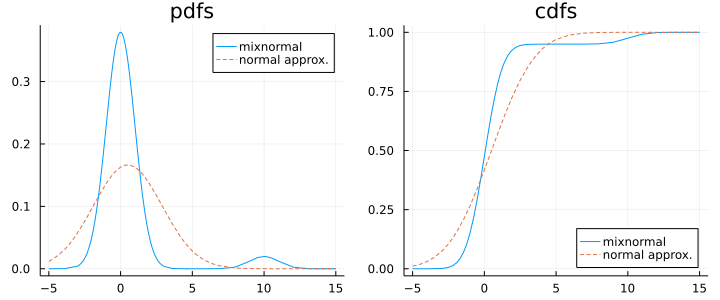

In [10]:
mixnormal = MixtureModel([Normal(), Normal(10, 1)], [0.95, 0.05])
normal = Normal(mean(mixnormal), std(mixnormal))
P = plot(x -> pdf(mixnormal, x), -5, 15; label="mixnormal")
plot!(x -> pdf(normal, x), -5, 15; label="normal approx.", ls=:dash)
title!("pdfs")
Q = plot(x -> cdf(mixnormal, x), -5, 15; label="mixnormal")
plot!(x -> cdf(normal, x), -5, 15; label="normal approx.", ls=:dash)
title!("cdfs"; legend=:bottomright)
plot(P, Q; size=(720, 300))

model = Normal{Float64}(μ=0.0, σ=1.0)


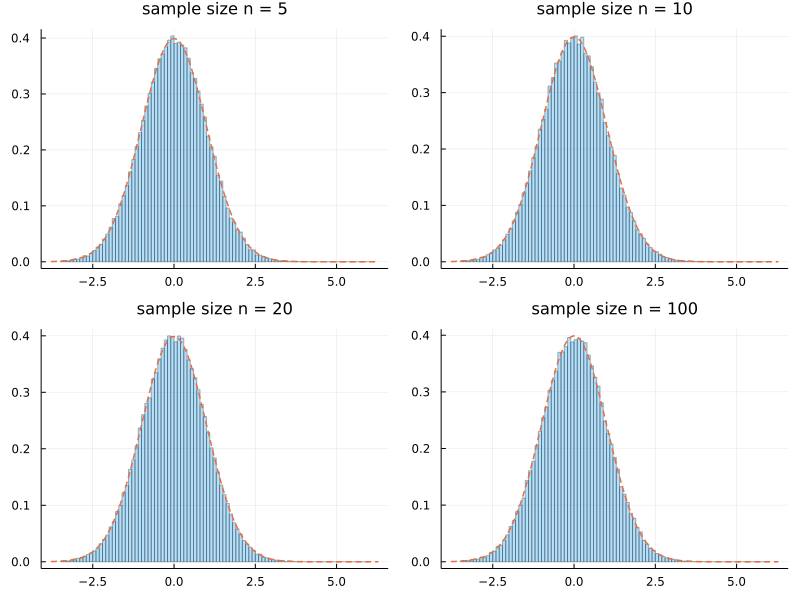

In [11]:
model = Normal()
@show model
μ, σ² = mean(model), var(model)
PP = []
for n in (5, 10, 20, 100)
    Z = [(mean(rand(model, n)) - μ)/√(σ²/n) for _ in 1:10^5]
    P = histogram(Z; norm=true, alpha=0.3, bin = -3.5:0.1:6, label="")
    plot!(x -> pdf(Normal(), x); label="", ls=:dash, lw=1.5)
    title!("sample size n = $n")
    push!(PP, P)
end
plot(PP...; size=(800, 600), layout=(2, 2), titlefontsize=11)

model = Uniform{Float64}(a=0.0, b=1.0)


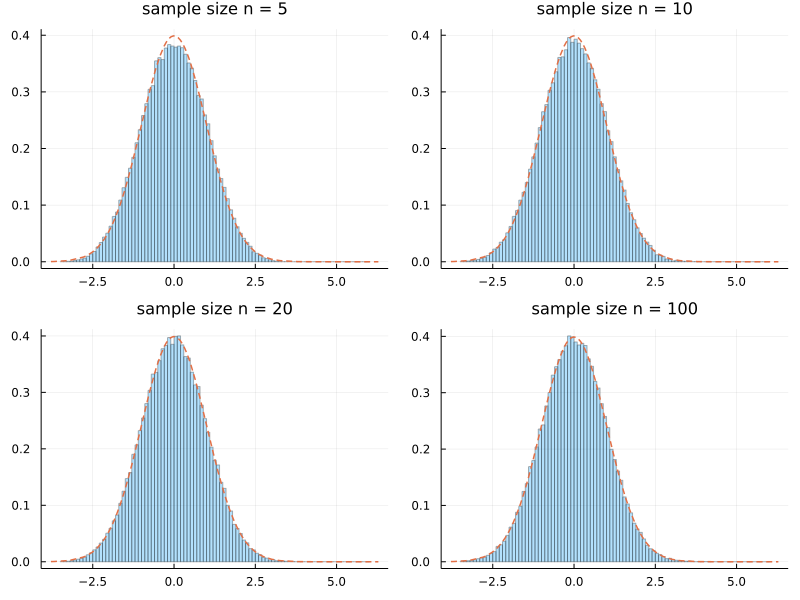

In [12]:
model = Uniform()
@show model
μ, σ² = mean(model), var(model)
PP = []
for n in (5, 10, 20, 100)
    Z = [(mean(rand(model, n)) - μ)/√(σ²/n) for _ in 1:10^5]
    P = histogram(Z; norm=true, alpha=0.3, bin = -3.5:0.1:6, label="")
    plot!(x -> pdf(Normal(), x); label="", ls=:dash, lw=1.5)
    title!("sample size n = $n")
    push!(PP, P)
end
plot(PP...; size=(800, 600), layout=(2, 2), titlefontsize=11)

model = Exponential{Float64}(θ=1.0)


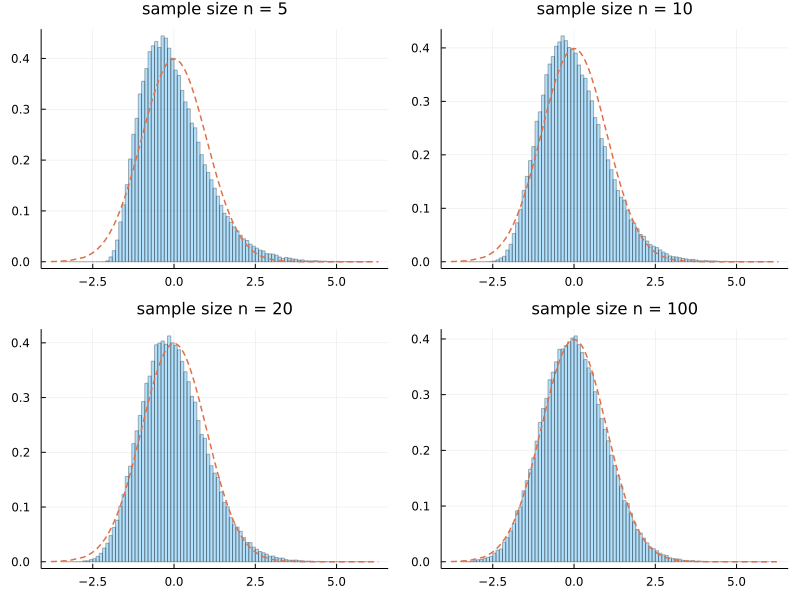

In [13]:
model = Exponential()
@show model
μ, σ² = mean(model), var(model)
PP = []
for n in (5, 10, 20, 100)
    Z = [(mean(rand(model, n)) - μ)/√(σ²/n) for _ in 1:10^5]
    P = histogram(Z; norm=true, alpha=0.3, bin = -3.5:0.1:6, label="")
    plot!(x -> pdf(Normal(), x); label="", ls=:dash, lw=1.5)
    title!("sample size n = $n")
    push!(PP, P)
end
plot(PP...; size=(800, 600), layout=(2, 2), titlefontsize=11)

model = MixtureModel{Normal{Float64}}(K = 2)
components[1] (prior = 0.9500): Normal{Float64}(μ=0.0, σ=1.0)
components[2] (prior = 0.0500): Normal{Float64}(μ=10.0, σ=1.0)



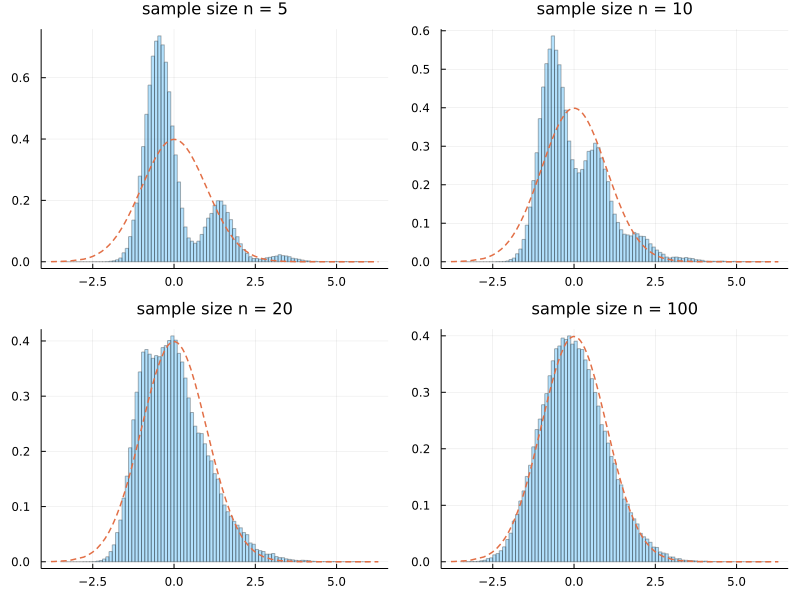

In [14]:
model = MixtureModel([Normal(), Normal(10, 1)], [0.95, 0.05])
@show model
μ, σ² = mean(model), var(model)
PP = []
for n in (5, 10, 20, 100)
    Z = [(mean(rand(model, n)) - μ)/√(σ²/n) for _ in 1:10^5]
    P = histogram(Z; norm=true, alpha=0.3, bin = -3.5:0.1:6, label="")
    plot!(x -> pdf(Normal(), x); label="", ls=:dash, lw=1.5)
    title!("sample size n = $n")
    push!(PP, P)
end
plot(PP...; size=(800, 600), layout=(2, 2), titlefontsize=11)